# Parte 1.2: Exploratory analysis of sales data

In [1]:
# import the libraries and root
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

root = Path(os.path.abspath('')).parent.parent

In [2]:
# import dataset
def read_dataset(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path)
    
df = read_dataset(file_path=root / "data" / "data_clean_analyse.csv")
df

,Unnamed: 0,ID,Data,Produto,Categoria,Quantidade,Preço,Total de Vendas
0,0,1,24/11/2023,Fone de Ouvido,Eletrônicos,3.0,383.70,1151.10
1,1,2,30/10/2023,Calça Jeans,Vestuário,4.0,86.56,346.24
2,2,3,07/10/2023,Calça Jeans,Vestuário,28.0,178.83,5007.24
3,3,4,23/05/2023,Monitor,Eletrônicos,27.0,2414.43,65189.61
4,4,5,23/01/2023,Marcador,Papelaria,58.0,18.41,1067.78
...,...,...,...,...,...,...,...,...
180,180,196,13/09/2023,Cadeira,Móveis,49.0,743.80,36446.20
181,181,197,22/12/2023,Tapete,Decoração,62.0,240.12,14887.44
182,182,198,16/12/2023,Vaso de Planta,Decoração,40.0,140.21,5608.40
183,183,199,30/12/2023,Tapete,Decoração,89.0,546.39,48628.71


In [3]:
# drop Unnamed:0 column
df = df.drop('Unnamed: 0', axis=1)
df

,ID,Data,Produto,Categoria,Quantidade,Preço,Total de Vendas
0,1,24/11/2023,Fone de Ouvido,Eletrônicos,3.0,383.70,1151.10
1,2,30/10/2023,Calça Jeans,Vestuário,4.0,86.56,346.24
2,3,07/10/2023,Calça Jeans,Vestuário,28.0,178.83,5007.24
3,4,23/05/2023,Monitor,Eletrônicos,27.0,2414.43,65189.61
4,5,23/01/2023,Marcador,Papelaria,58.0,18.41,1067.78
...,...,...,...,...,...,...,...
180,196,13/09/2023,Cadeira,Móveis,49.0,743.80,36446.20
181,197,22/12/2023,Tapete,Decoração,62.0,240.12,14887.44
182,198,16/12/2023,Vaso de Planta,Decoração,40.0,140.21,5608.40
183,199,30/12/2023,Tapete,Decoração,89.0,546.39,48628.71


## Products
**Top 5 most sales product by quantity**: Tapete, Estante, Sofá, Capacete e Maquiná de lavar
**Top 5 most sales product by sales total**: Sofá, Maquiná de lavar, Estante, Tablet e Bicicleta

1. Sofá, Máquina de Lavar and Estante indicates good balance between price and demand - don't change
2. Tapete and capacete: High sales by unit, but low price - reassess margins for this products
3. Tablet and bicicleta: 

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\1237248794.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=sum, palette="viridis", order=order)
C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\1237248794.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


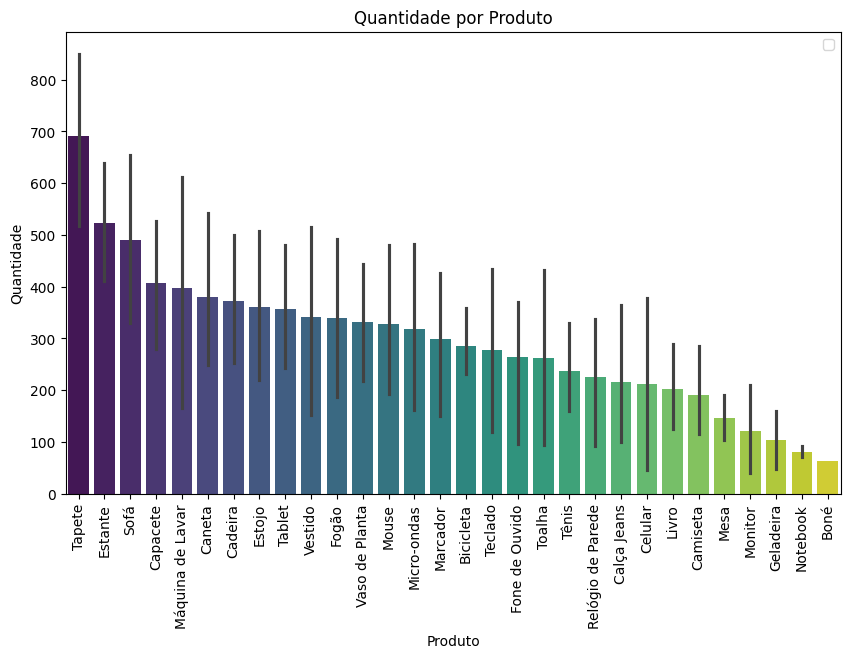

In [59]:
# By product
def dist_barplot(df: pd.DataFrame, x: str, y: str) -> None:
    if y == 'Preço':
        order = df.groupby(x)[y].mean().sort_values(ascending=False).index
        mean_price = df['Preço'].mean()
    
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x, y=y, data=df, estimator=np.mean, palette="viridis", order=order)
        plt.axhline(mean_price, color="red", linestyle="--", label=f"Mean price: R${mean_price:.2f}")
        
    else:        
        order = df.groupby(x)[y].sum().sort_values(ascending=False).index
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x, y=y, data=df, estimator=sum, palette="viridis", order=order)
        
    plt.title(f"{y} por {x}")
    plt.ylabel(f"{y}")
    plt.xlabel(f"{x}")
    plt.xticks(rotation=90)
    
    plt.legend()
    plt.show()

dist_barplot(df=df, x='Produto', y='Quantidade')

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\2056875887.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=sum, palette="viridis", order=order)
C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\2056875887.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


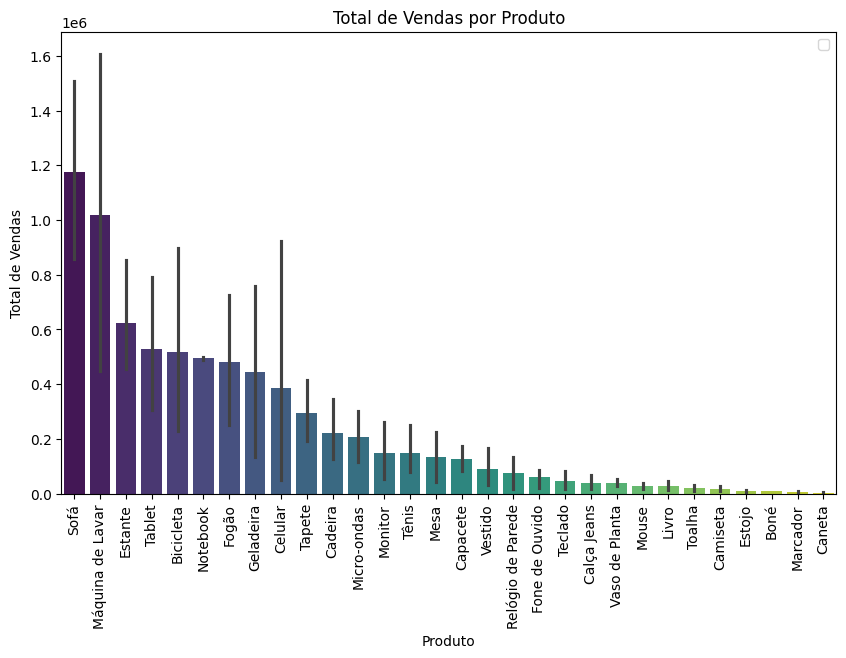

In [31]:
dist_barplot(df=df, x='Produto', y='Total de Vendas')

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\1873789600.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=np.mean, palette="viridis", order=order)


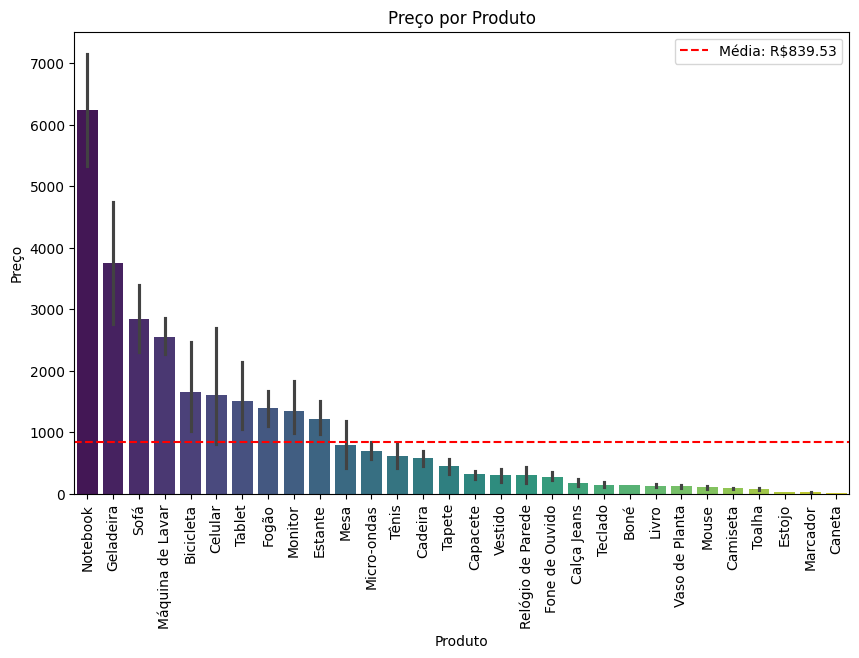

In [39]:
dist_barplot(df=df, x='Produto', y='Preço')

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\2056875887.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=sum, palette="viridis", order=order)
C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\2056875887.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


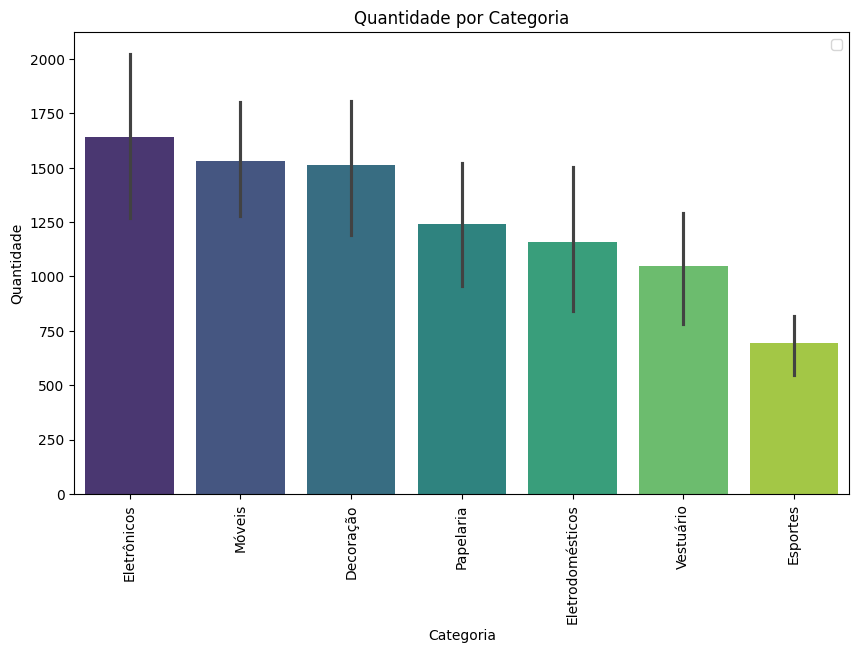

In [37]:
dist_barplot(df=df, x='Categoria', y='Quantidade')

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\1578786464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=sum, palette="viridis", order=category_order)


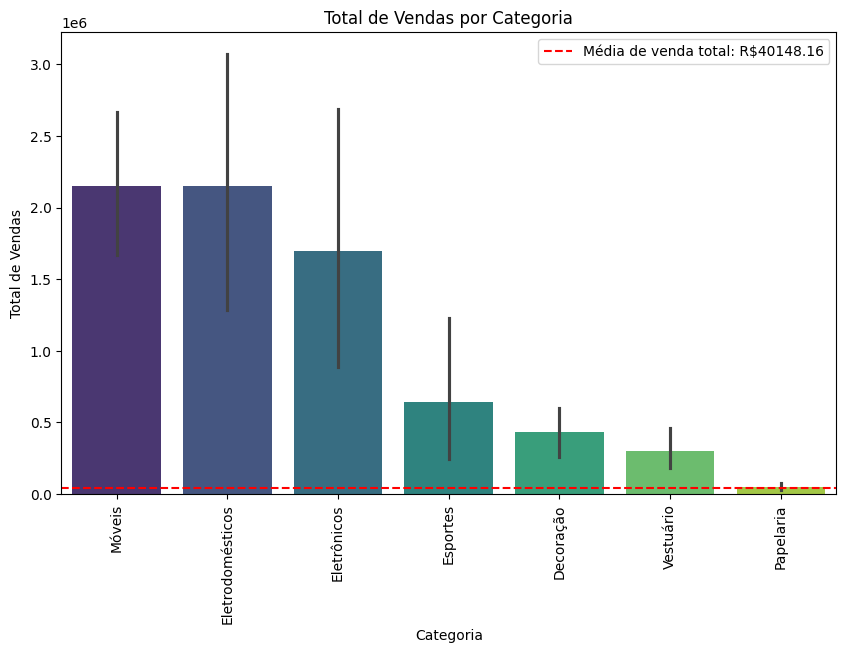

In [8]:
dist_barplot(df=df, x='Categoria', y='Total de Vendas')

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\1873789600.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, estimator=np.mean, palette="viridis", order=order)


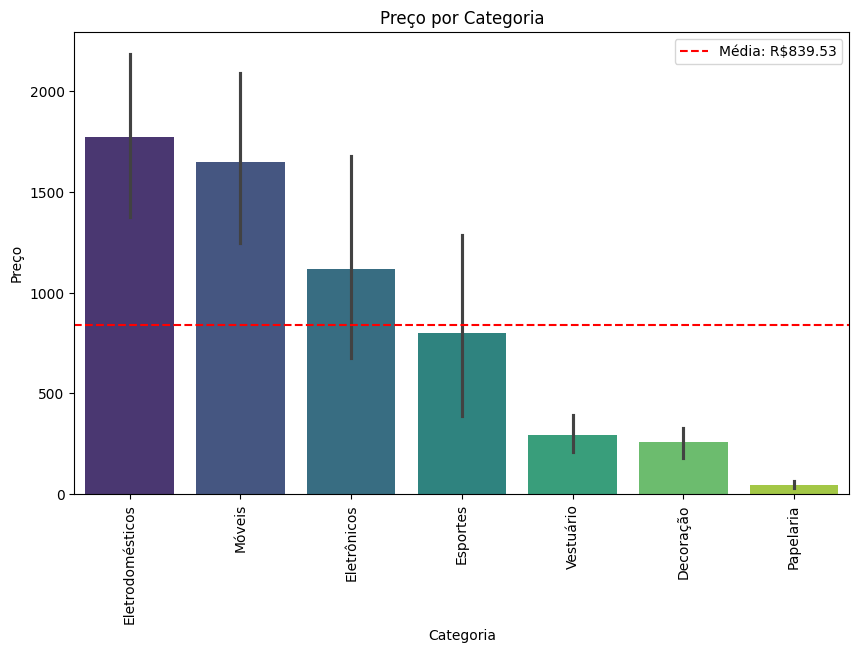

In [52]:
dist_barplot(df=df, x='Categoria', y='Preço')

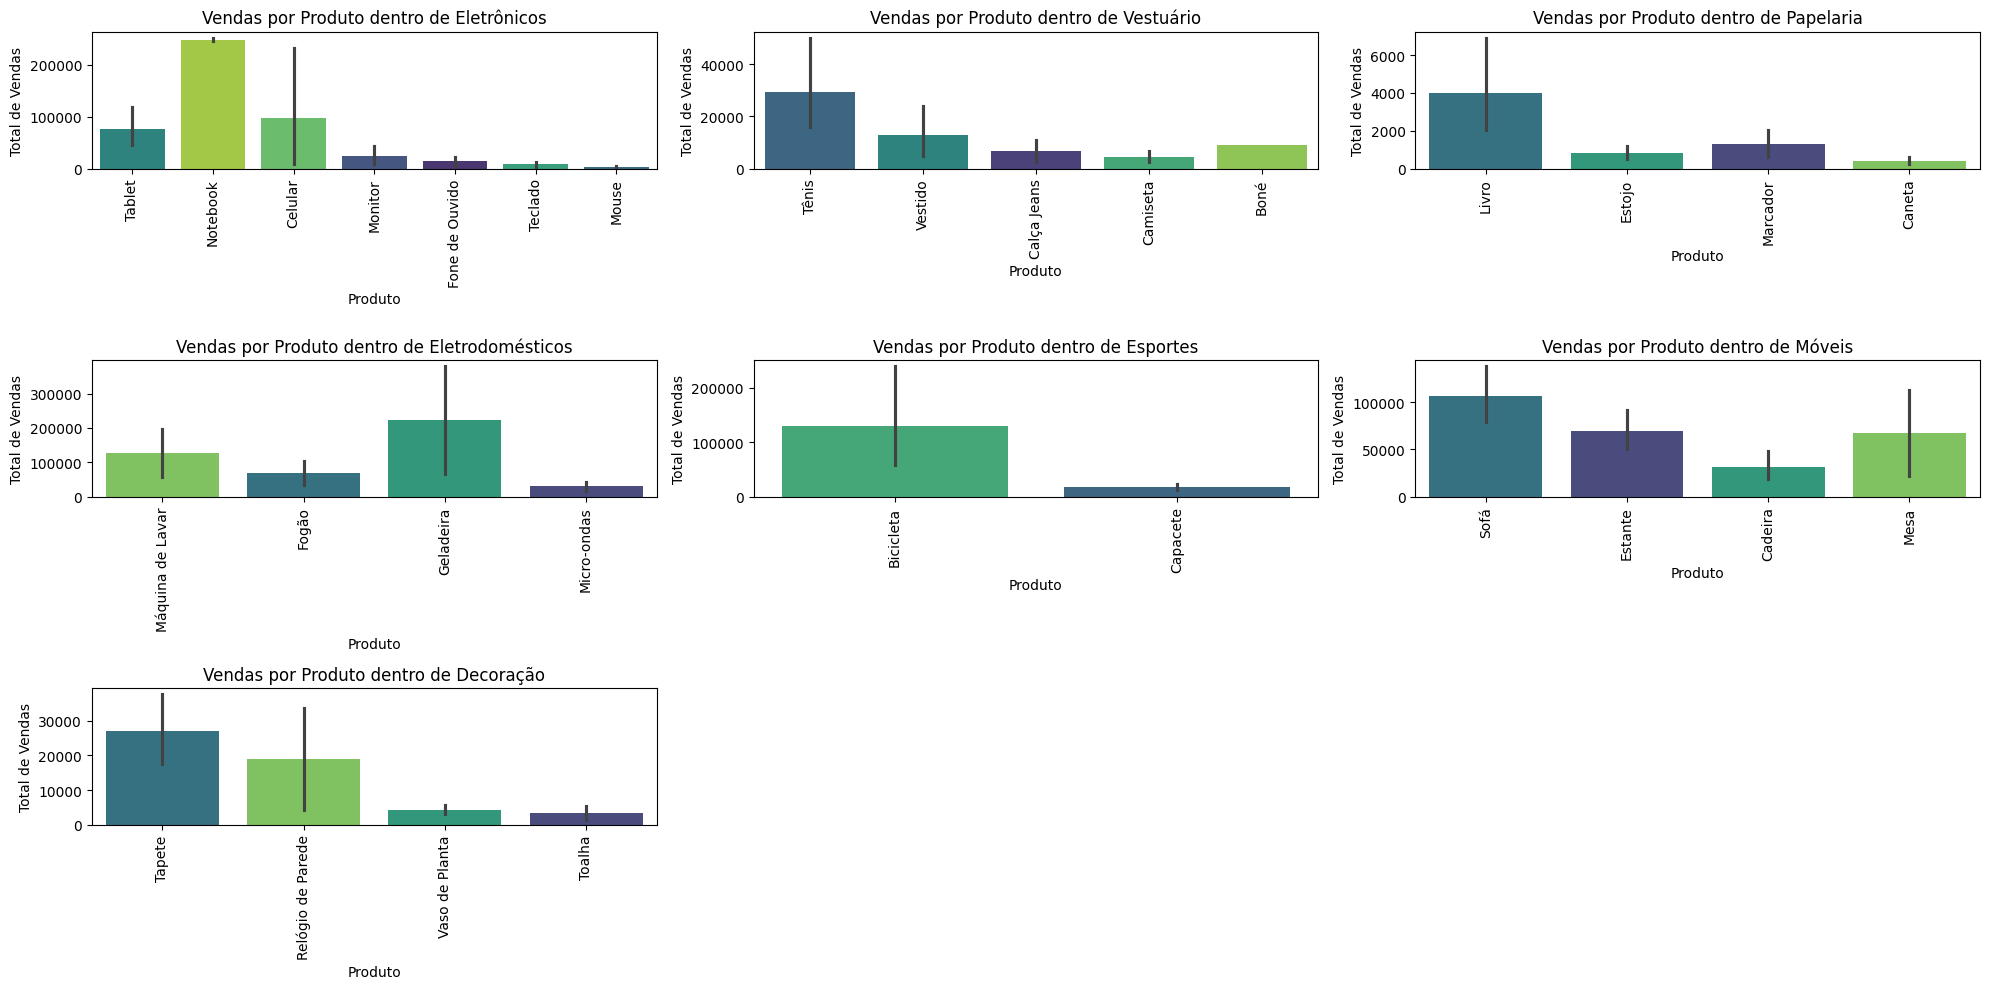

In [57]:
plt.figure(figsize=(20, 10))
for i, category in enumerate(df['Categoria'].unique()):
    plt.subplot(3, 3, i+1)
    
    df_category = df[df['Categoria'] == category]
    product_order = df_category.groupby("Produto")["Total de Vendas"].sum().sort_values(ascending=False).index
    
    sns.barplot(x="Produto", y="Total de Vendas", data=df_category, hue="Produto", palette="viridis", order=product_order)
    
    plt.title(f"Vendas por Produto dentro de {category}")
    plt.xlabel("Produto")
    plt.ylabel("Total de Vendas")
    plt.xticks(rotation=90)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

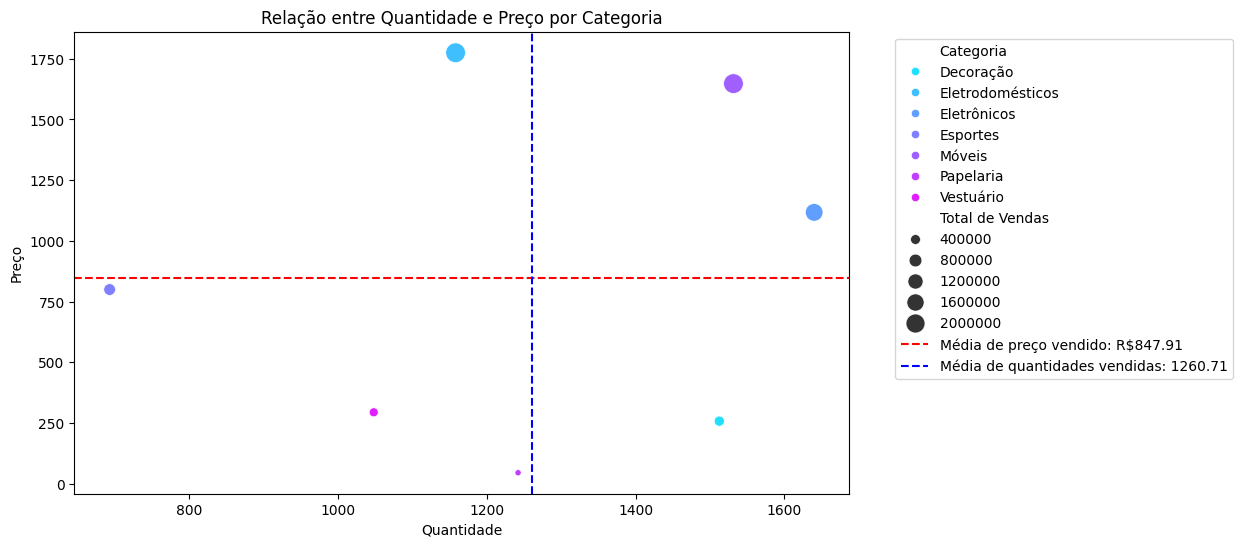

In [36]:
df_by_product = df.groupby("Categoria").agg({
    "Quantidade": "sum",
    "Preço": "mean",
    "Total de Vendas": "sum"}).reset_index()

mean_price = df_by_product['Preço'].mean()
mean_quant = df_by_product['Quantidade'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Quantidade", y="Preço", hue="Categoria", size="Total de Vendas", data=df_by_product, palette="cool", sizes=(20, 200))
plt.axhline(mean_price, color="red", linestyle="--", label=f"Média de preço vendido: R${mean_price:.2f}")
plt.axvline(mean_quant, color="blue", linestyle="--", label=f"Média de quantidades vendidas: {mean_quant:.2f}")

plt.title("Relação entre Quantidade e Preço por Categoria")
plt.ylabel("Preço")
plt.xlabel("Quantidade")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



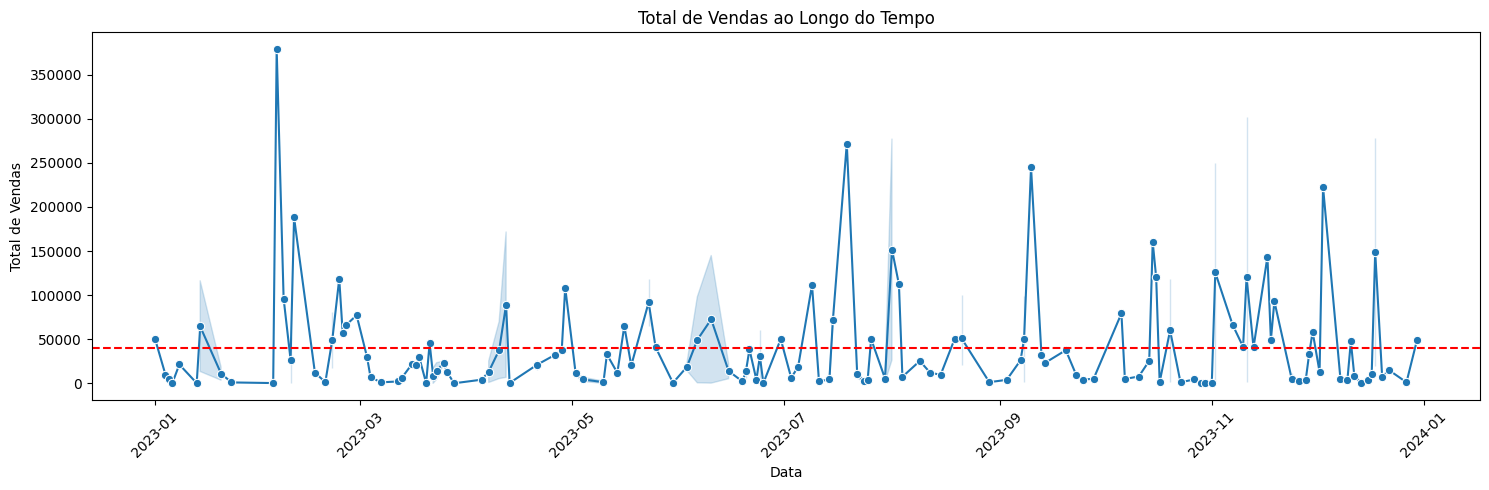

In [21]:
import matplotlib.dates as mdates
plt.figure(figsize=(15, 5))
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df_sorted = df.sort_values(by="Data")  
mean_price = df['Total de Vendas'].mean()

sns.lineplot(x="Data", y="Total de Vendas", marker="o", data=df_sorted)
plt.axhline(mean_price, color="red", linestyle="--", label=f"Média de preço vendido: R${mean_price:.2f}")

plt.title("Total de Vendas ao Longo do Tempo")
plt.ylabel("Total de Vendas")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\2774788292.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mês", y="Total de Vendas", data=df_monthly, palette="Blues_d")


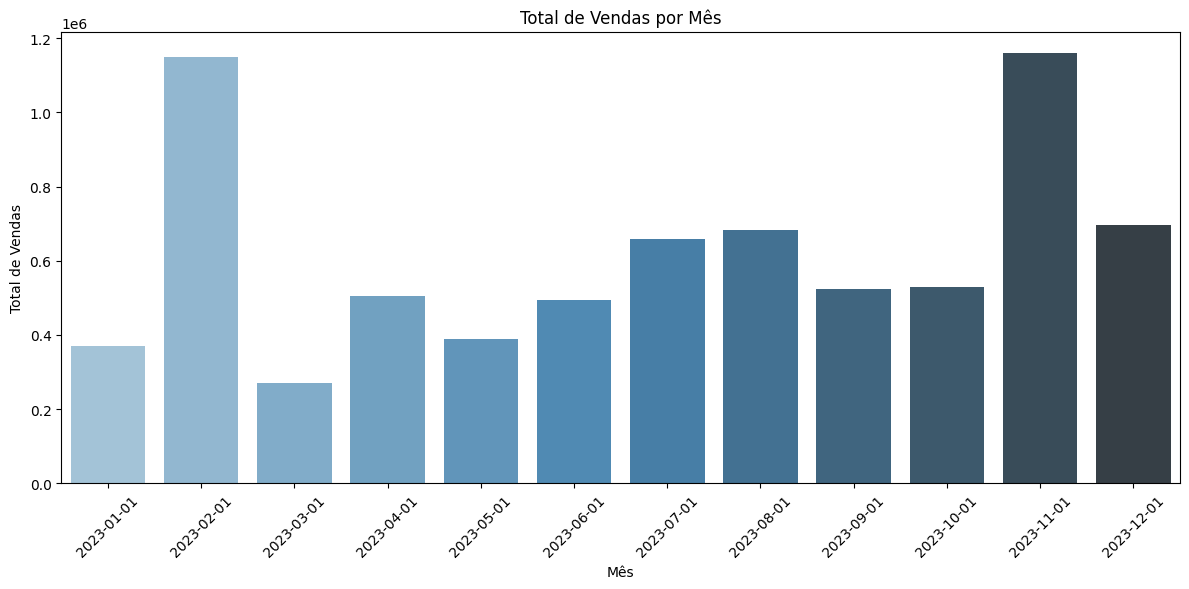

In [58]:
df['Mês'] = df['Data'].dt.strftime('%m/%Y')  
df_monthly = df.groupby('Mês', as_index=False)['Total de Vendas'].sum()

df_monthly['Mês'] = pd.to_datetime(df_monthly['Mês'], format='%m/%Y')
df_monthly = df_monthly.sort_values('Mês')

plt.figure(figsize=(12, 6))

sns.barplot(x="Mês", y="Total de Vendas", data=df_monthly, palette="Blues_d")

plt.title("Total de Vendas por Mês")
plt.ylabel("Total de Vendas")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\usuar\AppData\Local\Temp\ipykernel_13944\362085085.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mês", y="Quantidade", data=df_monthly, palette="Blues_d")


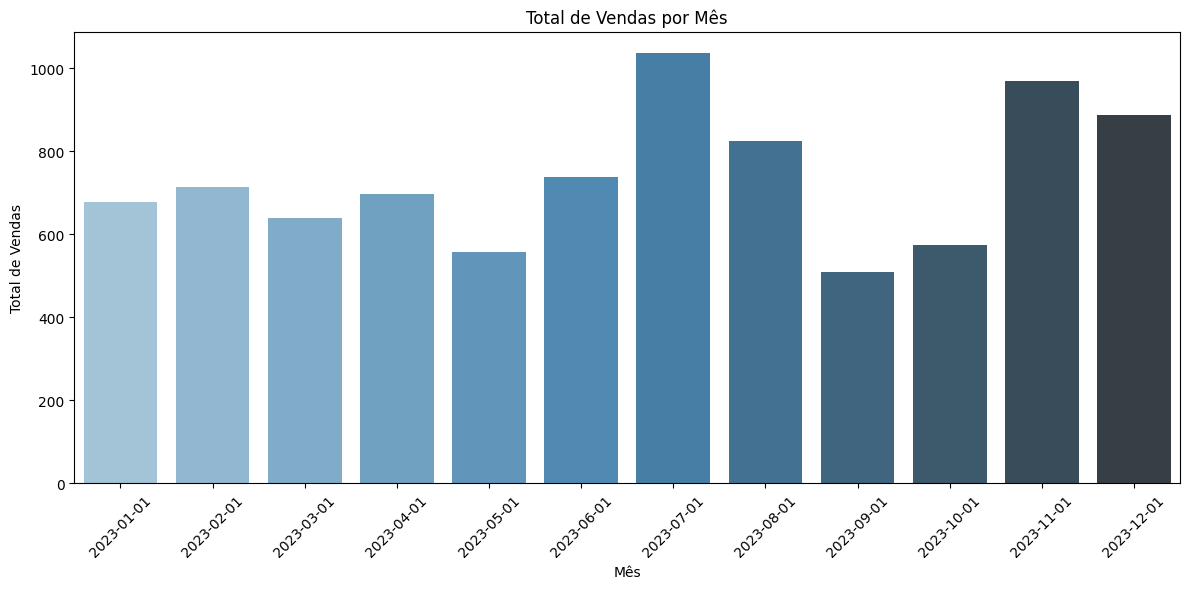

In [50]:
df['Mês'] = df['Data'].dt.strftime('%m/%Y')  
df_monthly = df.groupby('Mês', as_index=False)['Quantidade'].sum()

df_monthly['Mês'] = pd.to_datetime(df_monthly['Mês'], format='%m/%Y')
df_monthly = df_monthly.sort_values('Mês')

plt.figure(figsize=(12, 6))

sns.barplot(x="Mês", y="Quantidade", data=df_monthly, palette="Blues_d")

plt.title("Total de Vendas por Mês")
plt.ylabel("Total de Vendas")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

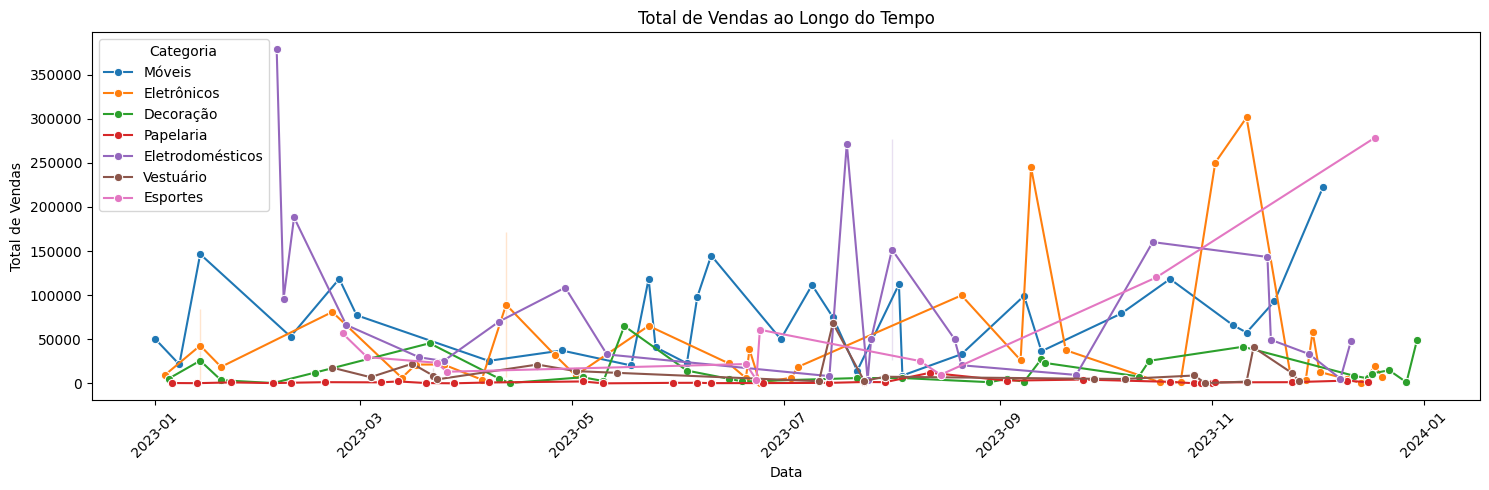

In [51]:
plt.figure(figsize=(15, 5))
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df_sorted = df.sort_values(by="Data")  

sns.lineplot(x="Data", y="Total de Vendas", hue='Categoria', marker="o", data=df_sorted)

plt.title("Total de Vendas ao Longo do Tempo")
plt.ylabel("Total de Vendas")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

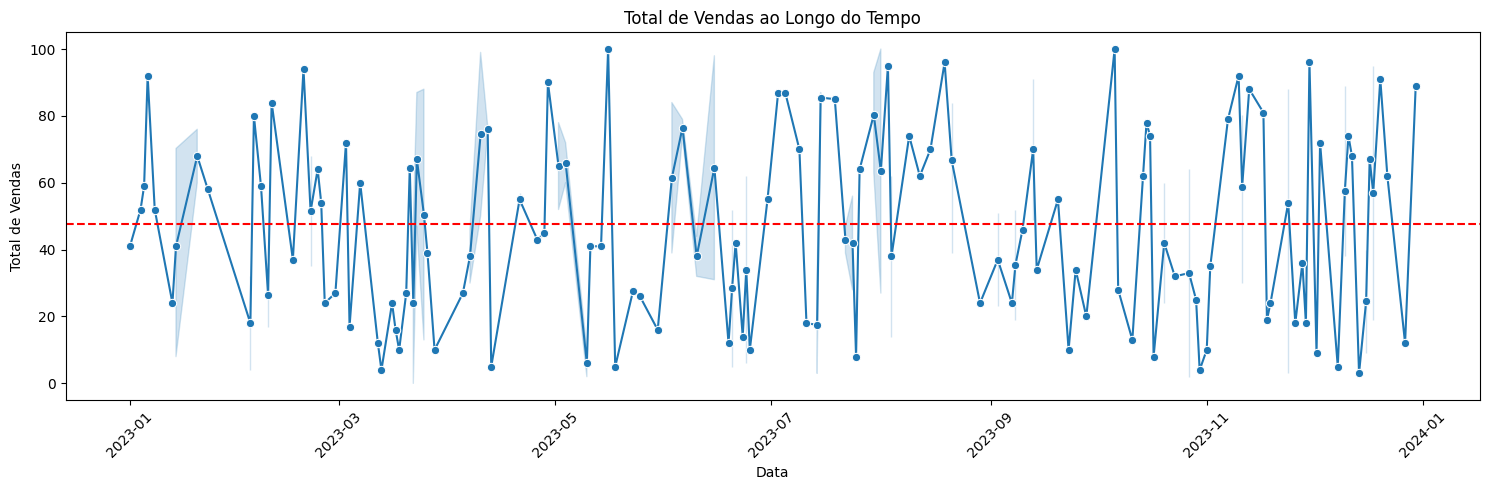

In [23]:
plt.figure(figsize=(15, 5))
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df_sorted = df.sort_values(by="Data")  
mean_quant = df['Quantidade'].mean()

sns.lineplot(x="Data", y="Quantidade", marker="o", data=df_sorted)
plt.axhline(mean_quant, color="red", linestyle="--", label=f"Média de preço vendido: R${mean_quant:.2f}")

plt.title("Total de Vendas ao Longo do Tempo")
plt.ylabel("Total de Vendas")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()